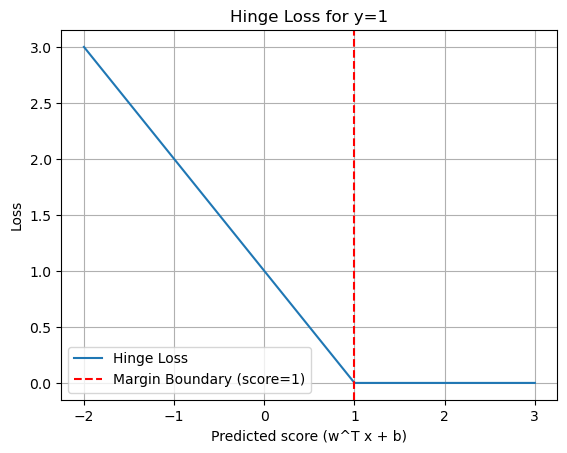

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def hinge_loss(y_true, y_pred):
    return np.maximum(0, 1 - y_true * y_pred)

# Create a range of predicted scores from -2 to 3
scores = np.linspace(-2, 3, 500)

# Assume true label y = +1 (apple)
y_true = 1

losses = hinge_loss(y_true, scores)

plt.plot(scores, losses, label='Hinge Loss')
plt.axvline(x=1, color='r', linestyle='--', label='Margin Boundary (score=1)')
plt.title('Hinge Loss for y=1')
plt.xlabel('Predicted score (w^T x + b)')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [2]:
def hinge_loss_and_gradient(w, X, y, C):
    n_samples, n_features = X.shape
    loss = 0.5 * np.dot(w, w)  # Regularization part (||w||^2 / 2)
    gradient = w.copy()

    for i in range(n_samples):
        condition = y[i] * np.dot(w, X[i])
        if condition < 1:
            loss += C * (1 - condition)
            gradient -= C * y[i] * X[i]

    return loss, gradient

# Example usage
X = np.array([[2, 3], [1, 1], [2, 1]])
y = np.array([1, -1, 1])
w = np.array([0.5, -0.5])
C = 1

loss, grad = hinge_loss_and_gradient(w, X, y, C)
print(f"Loss: {loss:.3f}")
print(f"Gradient: {grad}")


Loss: 3.250
Gradient: [-2.5 -3.5]


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from sklearn.datasets import make_blobs

# Generate synthetic 2D data
X, y = make_blobs(n_samples=60, centers=2, random_state=42, cluster_std=1.5)
y = np.where(y == 0, -1, 1)  # Labels: -1 and +1

# Add bias term
X_bias = np.hstack([X, np.ones((X.shape[0], 1))])

# Initialize weights randomly
w = np.random.randn(X_bias.shape[1]) * 0.1

# Hinge loss and gradient
def hinge_loss_and_gradient(w, X, y, C=1.0):
    loss = 0.5 * np.dot(w[:-1], w[:-1])  # Regularization on weights only, not bias
    grad = np.hstack([w[:-1], 0])        # Gradient vector with 0 for bias grad initially

    for i in range(len(y)):
        margin = y[i] * np.dot(w, X[i])
        if margin < 1:
            loss += C * (1 - margin)
            grad[:-1] -= C * y[i] * X[i][:-1]
            grad[-1]   -= C * y[i] * X[i][-1]

    return loss, grad

# Training parameters
lr = 0.01
epochs = 100
C = 1.0

weights_history = []
loss_history = []

for epoch in range(epochs):
    loss, grad = hinge_loss_and_gradient(w, X_bias, y, C)
    w = w - lr * grad
    weights_history.append(w.copy())
    loss_history.append(loss)

# Plotting and animation setup
fig, ax = plt.subplots(figsize=(8,6))

# Function to calculate hinge losses per point for coloring
def hinge_losses(w, X, y):
    margins = y * (X @ w)
    losses = np.maximum(0, 1 - margins)
    return losses

def plot_frame(w, epoch):
    ax.clear()
    
    losses = hinge_losses(w, X_bias, y)
    
    # Scatter plot: size corresponds to hinge loss magnitude (points with higher loss are bigger)
    scatter = ax.scatter(X[:,0], X[:,1], c=y, cmap='bwr', s=50 + 200*losses, alpha=0.7, edgecolors='k', linewidth=0.7)
    
    # Decision boundary line: w1*x + w2*y + b = 0 => y = (-b - w1*x) / w2
    x_vals = np.array(ax.get_xlim())
    if w[1] != 0:
        y_vals = (-w[2] - w[0]*x_vals) / w[1]
        ax.plot(x_vals, y_vals, 'k-', label='Decision Boundary', linewidth=2)
        
        # Margins: y = (-b - w1*x ± 1)/w2
        margin_pos = (-w[2] - w[0]*x_vals + 1)/w[1]
        margin_neg = (-w[2] - w[0]*x_vals - 1)/w[1]
        ax.plot(x_vals, margin_pos, 'k--', label='Margins')
        ax.plot(x_vals, margin_neg, 'k--')
    
    ax.set_title(f'SVM Training with Hinge Loss\nEpoch: {epoch+1} | Loss: {loss_history[epoch]:.3f}')
    ax.set_xlim(X[:,0].min() - 1, X[:,0].max() + 1)
    ax.set_ylim(X[:,1].min() - 1, X[:,1].max() + 1)
    ax.legend(loc='upper right')
    ax.grid(True)

# Animation function
def update(epoch):
    plot_frame(weights_history[epoch], epoch)

ani = animation.FuncAnimation(fig, update, frames=epochs, interval=100)

# Save GIF to /mnt/data (or your current working directory)
gif_path = 'svm_hinge_training_refined.gif'
ani.save(gif_path, writer='pillow', dpi=80)

plt.close(fig)
print(f'GIF saved at {gif_path}')


GIF saved at svm_hinge_training_refined.gif
